# Internet News and Consumer Engagement

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement)) consists of data about news articles collected from Sept. 3, 2019 until Nov. 4, 2019. Afterwards, it is enriched by Facebook engagement data, such as number of shares, comments and reactions. It was first created to predict the popularity of an article before it was published.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install nlplot

     |████████████████████████████████| 967 kB 5.5 MB/s 
     |████████████████████████████████| 22.9 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline

## Load your data

In [ ]:
cd /content/drive/MyDrive/11_Python/datacamp

/content/drive/MyDrive/11_Python/datacamp


In [ ]:
# Load data from the csv file
df = pd.read_csv('news_articles.csv', index_col=0)
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 10437
Number of columns/variables: 14


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


## Understand your variables

In [ ]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

var_dict = pd.read_csv('./data/vars_description.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Description
Variable,,,
source_id,13,"[reuters, the-irish-times, al-jazeera-english,...",publisher unique identifier
source_name,13,"[Reuters, The Irish Times, Al Jazeera English,...",human-readable publisher name
author,2580,"[Reuters Editorial, Eoin Burke-Kennedy, Deirdr...",article author
title,9810,[NTSB says Autopilot engaged in 2018 Californi...,article headline
description,9173,[The National Transportation Safety Board said...,article short description
url,10433,[https://www.reuters.com/article/us-tesla-cras...,article URL from publisher website
url_to_image,8363,[https://s4.reutersmedia.net/resources/r/?m=02...,url to main image associated with the article
published_at,9441,"[2019-09-03T16:22:20Z, 2019-09-03T10:32:28Z, 2...",exact time and date of publishing the article
content,8385,[WASHINGTON (Reuters) - The National Transport...,unformatted content of the article truncated t...


# 1. Explore and Preprocessing Data

## 1-1. Data confirmation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        10437 non-null  object 
 1   source_name                      10437 non-null  object 
 2   author                           9417 non-null   object 
 3   title                            10435 non-null  object 
 4   description                      10413 non-null  object 
 5   url                              10436 non-null  object 
 6   url_to_image                     9781 non-null   object 
 7   published_at                     10436 non-null  object 
 8   content                          9145 non-null   object 
 9   top_article                      10435 non-null  float64
 10  engagement_reaction_count        10319 non-null  float64
 11  engagement_comment_count         10319 non-null  float64
 12  engagement_share_c

In [ ]:
df.describe(include="all")

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10437,10437,9417,10435,10413,10436,9781,10436,9145,10435.000000,10319.000000,10319.000000,10319.000000,10319.000000
unique,13,13,2580,9810,9173,10433,8363,9441,8385,NaN,NaN,NaN,NaN,NaN
top,reuters,Reuters,The Associated Press,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",https://www.cbsnews.com/video/lil-nas-x-on-his...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-07T05:00:00Z,Chat with us in Facebook Messenger. Find out w...,NaN,NaN,NaN,NaN,NaN
freq,1252,1252,975,6,408,2,379,25,125,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122089,381.395290,124.032949,196.236263,0.011629
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327404,4433.344792,965.351188,1020.680229,0.268276
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,8.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,43.000000,12.000000,47.500000,0.000000


## 1-2. Confirm null-data rate of each columns

In [ ]:
#Check lacking Data count

def get_null_df(features):
    col_null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = features.columns[features.isna().any()].to_list()
    L = len(features)
    for col in col_null:
        T = 0
        if features[col].dtype == "float64":
            T = "Numerical"  
        else:
            T = "String"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Column': col, 
                                          'Type': T,
                                          'Total NaN': nulls,
                                          '%': (nulls / L)*100
                                         }, ignore_index=True)
    return col_null_df

get_null_df(df)

,Column,Type,Total NaN,%
0,author,String,1020,9.772923
1,title,String,2,0.019163
2,description,String,24,0.229951
3,url,String,1,0.009581
4,url_to_image,String,656,6.285331
5,published_at,String,1,0.009581
6,content,String,1292,12.379036
7,top_article,Numerical,2,0.019163
8,engagement_reaction_count,Numerical,118,1.130593
9,engagement_comment_count,Numerical,118,1.130593


12.3% contents are not listed and should be removed from the data. <br>Data with an unknown authour will also be deleted.<br>
118 data items with missing engagement information will be deleted as well, as they are not useful for identifying populalities.

In [ ]:
df_rev = df[~df.content.isnull()]
df_rev = df_rev[~df_rev.author.isnull()]
df_rev = df_rev[~df_rev.engagement_reaction_count.isnull()].reset_index(drop=True)
get_null_df(df_rev)

,Column,Type,Total NaN,%
0,description,String,6,0.073430
1,url_to_image,String,561,6.865745


Removed data that could not be evaluated from the engagement. <br>There are still 6 data with "NaN" description, so lets check the details.

In [ ]:
df_rev[df_rev.description.isnull()]

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
1821,the-irish-times,The Irish Times,The Irish Times,Hero: a poem about Robert Mugabe by Kevin Higgins,NaN,https://www.irishtimes.com/culture/books/hero-...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-06T09:23:31Z,"The day you fall, bawling into the worldin a v...",0.0,17.0,1.0,6.0,0.0
2338,the-irish-times,The Irish Times,Colette Bryce,Poem of the week: 21 Westland Row by Colette B...,NaN,https://www.irishtimes.com/culture/books/poem-...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-07T05:00:00Z,"Blue, the morning. Green, the lights.Raucous t...",0.0,0.0,0.0,1.0,0.0
2855,al-jazeera-english,Al Jazeera English,Al Jazeera,"Strong typhoon disrupts transport, cuts power ...",NaN,https://www.aljazeera.com/news/2019/09/strong-...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-09T00:53:54Z,One of the strongest typhoons to hit Tokyo in ...,0.0,21.0,7.0,23.0,0.0
2875,al-jazeera-english,Al Jazeera English,Al Jazeera,Twenty-nine killed in two attacks in Burkina Faso,NaN,https://www.aljazeera.com/news/2019/09/twenty-...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-09T00:22:59Z,At least 29 people were killed in Burkina Faso...,0.0,42.0,8.0,56.0,0.0
3417,cnn,CNN,"Tami Luhby, CNN","US median income stayed flat in 2018, Census says",NaN,https://www.cnn.com/2019/09/10/politics/us-med...,https://cdn.cnn.com/cnnnext/dam/assets/1909091...,2019-09-10T14:18:34Z,(CNN)Median US household income stayed essenti...,0.0,419.0,748.0,167.0,0.0
4609,cnn,CNN,"AJ Willingham, CNN","A sweet social media moment revealed, a wrong ...",NaN,https://www.cnn.com/2019/09/13/us/the-good-stu...,https://cdn.cnn.com/cnnnext/dam/assets/1909090...,2019-09-14T03:28:15Z,(CNN)You know what gets a bad rap? Pumpkin spi...,0.0,0.0,0.0,8.0,0.0


The description has been applied, but the other information has been entered correctly, so I use this dataframe for data analysis.

# 2. Analysis of each Engagement Value

## 2-1. Identifying trends in the number of engagements

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



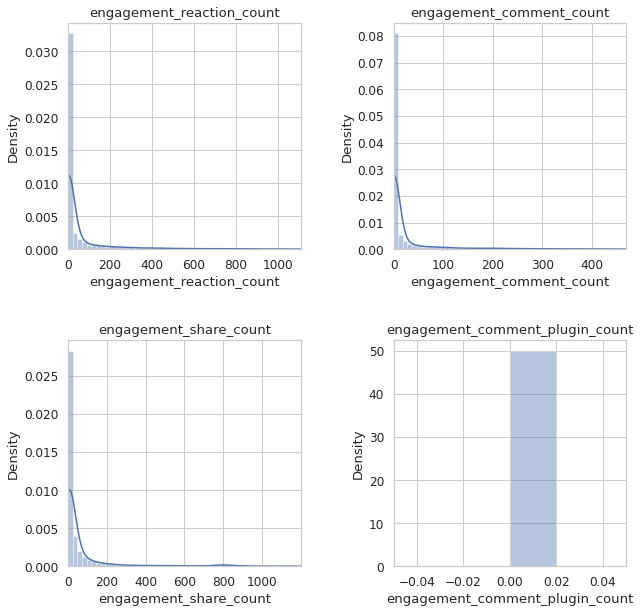

In [ ]:
# numeric columns
num_cols = ['engagement_reaction_count', 'engagement_comment_count',
             'engagement_share_count', 'engagement_comment_plugin_count']

# exclude outliers from the visualization
max_xlims = []

for i in num_cols:
    q_95 = df_rev[i].quantile(0.95)
    max_xlims.append(q_95)

# Distribution visualization of numerical data
fig =plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i,num_col,max_xlim in zip([0,1,2,3],num_cols,max_xlims):
    le = fig.add_subplot(2,2,i+1)
    df_plot = df_rev[df_rev[num_col] <= max_xlim]
    sns.distplot(df_plot[num_col])
    plt.title(num_col)
    plt.xlim(0,max_xlim)

In [ ]:
df_rev[num_cols].describe(include="all")

,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,8171.000000,8171.000000,8171.000000,8171.000000
mean,356.206829,130.488802,215.961082,0.011994
std,2760.460750,951.914768,1025.716779,0.283540
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,9.000000,0.000000
75%,50.000000,15.000000,54.000000,0.000000
max,125106.000000,48490.000000,36720.000000,15.000000


It seems that most articles are not responded to even if they are posted.
The comment "engagement_comment_pligin_count" in the Facebook plugin is not enough information to see the trend, so it is excluded in the following analysis.

# 3. Grip Characteristics of Popular Articles from Source

## 3-1. Differences in engagement by source name

Confirm engagement statistics of wach source as below.

In [ ]:
df_rev[['source_name','engagement_reaction_count']].groupby("source_name").agg(['count','min', 'max', 'sum', 'mean', 'median', 'std']).sort_values(('engagement_reaction_count',   'mean'),ascending=False)

engagement_reaction_count       ...                    
                                            count  min  ... median          std
source_name                                             ...                    
CBS News                                      420  0.0  ...  192.5  2761.553610
CNN                                           535  0.0  ...   17.0  3797.634079
BBC News                                      656  0.0  ...    7.0  6063.975451
The New York Times                            860  0.0  ...   50.0  3477.646206
ABC News                                     1136  0.0  ...    0.0  3252.244536
Al Jazeera English                            470  0.0  ...    4.5   980.231766
The Wall Street Journal                       293  0.0  ...   17.0  1254.814838
Business Insider                              985  0.0  ...   12.0  1716.661847
Newsweek                                      539  0.0  ...    2.0   644.536475
The Irish Times                               990  0.0  ...    0.0   119.073955
Reuters                                      1239  0.0  ...    0.0    69.469863
ESPN                                           48  0.0  ...    0.0     0.000000

[12 rows x 7 columns]

In [ ]:
df_rev[['source_name', 'engagement_comment_count']].groupby("source_name").agg(['count','min', 'max', 'sum', 'mean', 'median', 'std']).sort_values(('engagement_comment_count',   'mean'),ascending=False)

engagement_comment_count       ...                    
                                           count  min  ... median          std
source_name                                            ...                    
CBS News                                     420  0.0  ...   70.0   997.372853
CNN                                          535  0.0  ...    5.0  1503.501006
BBC News                                     656  0.0  ...    2.5  2307.595639
The New York Times                           860  0.0  ...   12.0   968.789258
The Wall Street Journal                      293  0.0  ...    5.0   493.069935
Business Insider                             985  0.0  ...    1.0   764.695722
Al Jazeera English                           470  0.0  ...    1.0   346.574468
ABC News                                    1136  0.0  ...    0.0   740.959831
Newsweek                                     539  0.0  ...    0.0   263.294061
The Irish Times                              990  0.0  ...    0.0    41.971889
Reuters                                     1239  0.0  ...    0.0    34.292756
ESPN                                          48  0.0  ...    0.0     0.000000

[12 rows x 7 columns]

In [ ]:
df_rev[['source_name','engagement_share_count']].groupby("source_name").agg(['count','min', 'max', 'sum', 'mean', 'median', 'std']).sort_values(('engagement_share_count',   'mean'),ascending=False)

engagement_share_count       ...                    
                                         count  min  ... median          std
source_name                                          ...                    
Reuters                                   1239  0.0  ...    2.0  1325.139234
BBC News                                   656  0.0  ...   19.5  2099.788257
Business Insider                           985  0.0  ...   13.0   809.744335
CNN                                        535  0.0  ...   44.0  1173.488212
The New York Times                         860  0.0  ...   45.0  1104.017131
CBS News                                   420  0.0  ...   51.0   666.817379
The Wall Street Journal                    293  0.0  ...   22.0   338.889893
Al Jazeera English                         470  0.0  ...   19.0   226.242402
ABC News                                  1136  0.0  ...    3.0   737.842963
Newsweek                                   539  0.0  ...    3.0   193.502198
The Irish Times                            990  0.0  ...    1.0    25.215668
ESPN                                        48  0.0  ...    0.0     0.000000

[12 rows x 7 columns]

Judging simply by the average, CBN and CNN have more reactions and comments, while Reuters has fewer. In contrast, Reuters has a very large number of sharing items. However, if we check the median, we can see that CBS and CNN have more shares. Therefore, there are cases where reuter has an extremely large number of shares, and it would be a bit dangerous to take the data as it is without a clear reason for it. <br>This trend is very interesting.

Text(0.5, 1.0, 'Correlation of each engagement with Reuters')

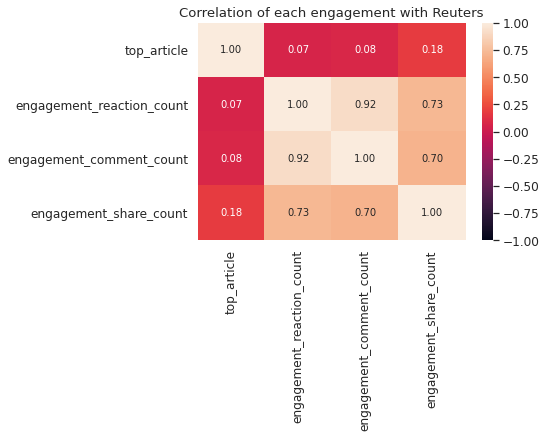

In [ ]:
# correlation of engagement with Reuters

with_reuters = df_rev.copy() 

corr_col = ['top_article','engagement_reaction_count', 'engagement_comment_count','engagement_share_count']
df_corr = with_reuters[corr_col].corr()

sns.heatmap(df_corr, annot=True, fmt='.2f', vmin = -1, vmax = 1)
plt.title("Correlation of each engagement with Reuters")

Text(0.5, 1.0, 'Correlation of each engagement w/o Reuters')

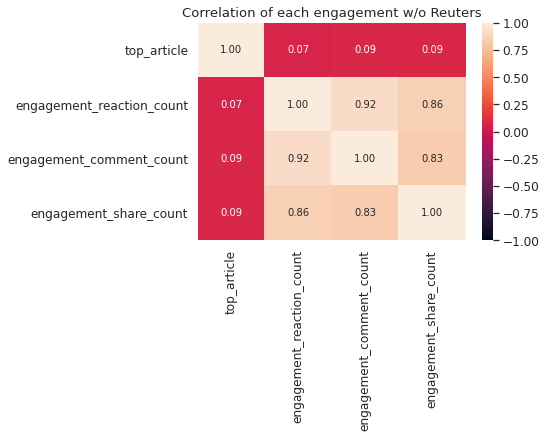

In [ ]:
# correlation of engagement without Reuters

without_reuters = df_rev[df_rev.source_name != "Reuters"] 

corr_col = ['top_article','engagement_reaction_count', 'engagement_comment_count','engagement_share_count']
df_corr = without_reuters[corr_col].corr()

sns.heatmap(df_corr, annot=True, fmt='.2f', vmin = -1, vmax = 1)
plt.title("Correlation of each engagement w/o Reuters")

As we guessed, the correlation coefficient between the engagement figures was higher when we checked the trend using data excluding Reuters. This is more natural and makes more sense. Therefore, in the following analysis, we will check the trend of popular articles for articles other than Reuters.

## 3-2. Differences in engagement by author
Next, check below to see if there are differences in popular articles by author.

In [ ]:
# label encoding of author

df_rev = df_rev[df_rev.source_name != "Reuters"].reset_index(drop=True)
cols = ['source_name','author','engagement_reaction_count', 'engagement_comment_count','engagement_share_count']
q_values = max_xlims[:3]

df_author = df_rev[cols].copy()

In [ ]:

lbl = LabelEncoder() 
lbl.fit(list(df_author["author"].values)) 
df_author["author"] = lbl.transform(list(df_author["author"].values))

df_author.fillna(0,inplace=True)

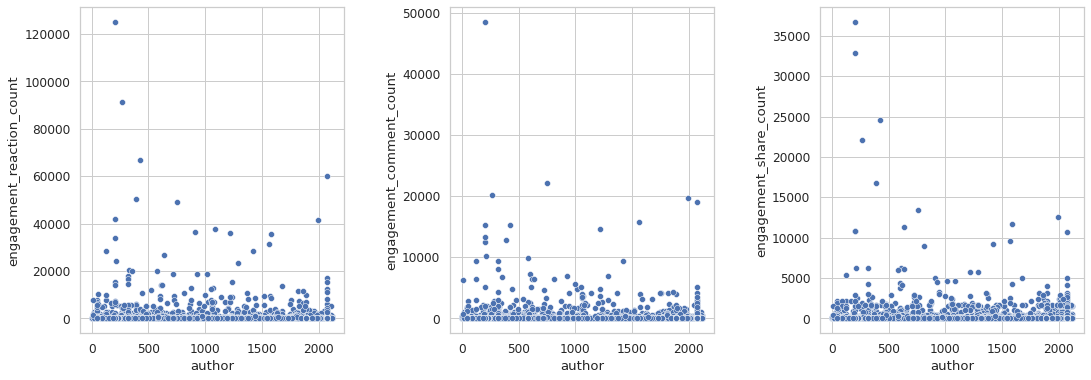

In [ ]:
y_labels=['engagement_reaction_count', 'engagement_comment_count','engagement_share_count']

fig =plt.figure(figsize=(18,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i,y_label in enumerate(y_labels):
    le = fig.add_subplot(1,3,i+1)
    sns.scatterplot(data=df_author,x="author",y=y_label)

This result shows that there is no direct relationship between author and engagement.

## 3-3. Differences in engagement by published date
Check out the trends in engagement against publication date below.

In [ ]:
df_date.columns[14:]

Index(['published_month', 'published_day', 'published_hour',
       'published_weekday'],
      dtype='object')

In [ ]:
df_date = df_rev.copy()

df_date["published_at"] = pd.to_datetime(df_date["published_at"])
df_date["published_month"] =  df_date["published_at"].apply(lambda x: x.month)
df_date["published_day"] =  df_date["published_at"].apply(lambda x: x.day)
df_date["published_hour"] =  df_date["published_at"].apply(lambda x: x.hour)
df_date["published_weekday"] =  df_date["published_at"].apply(lambda x: x.weekday())

print("Unique month_" + str(df_date.published_month.unique()))
print("Unique day_" + str(df_date.published_day.unique()))
print("Unique hour_" + str(df_date.published_hour.unique()))
print("Unique weekdays_" + str(df_date.published_weekday.unique()))

Unique month_[ 9 10]
Unique day_[ 3  5  6  7  9 10 12 14 15 19 27  1  2]
Unique hour_[10 17 15 16  9 14  1 13 11 18  6  7 12  8  3  2  0  5  4 19]
Unique weekdays_[1 3 4 5 0 6 2]


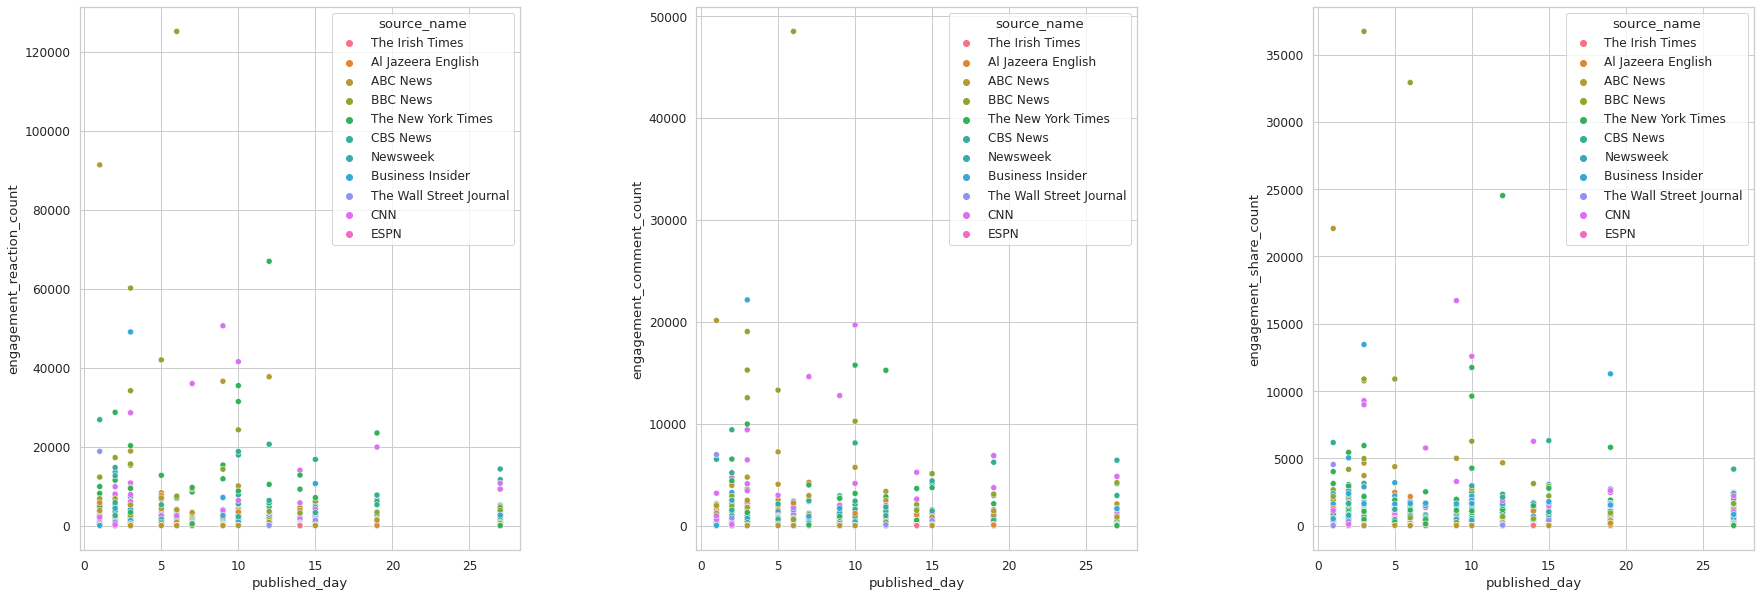

In [ ]:
# engagement of each day
fig =plt.figure(figsize=(30,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i,y_label in enumerate(y_labels):
    le = fig.add_subplot(1,3,i+1)
    sns.scatterplot(data=df_date,x="published_day",y=y_label, hue="source_name")

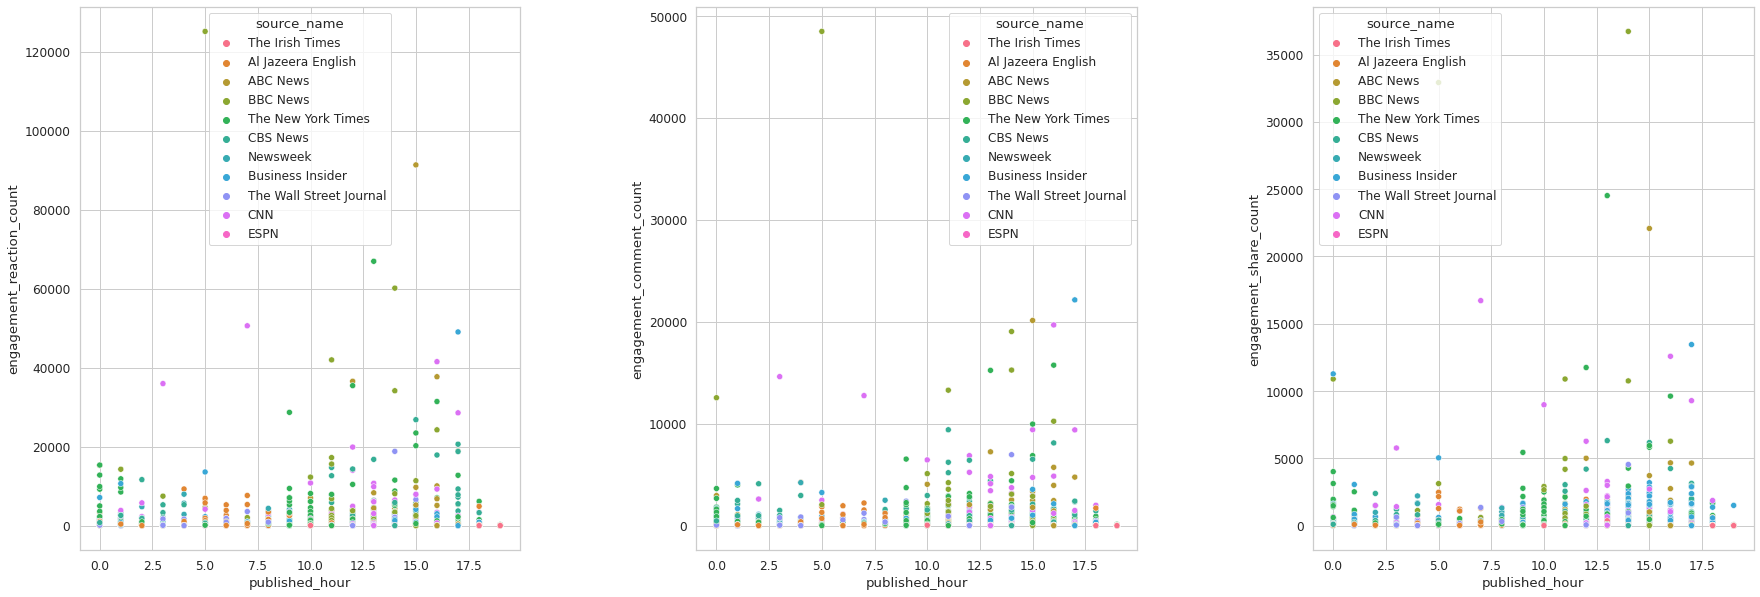

In [ ]:
# engagement of each hour
fig =plt.figure(figsize=(30,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i,y_label in enumerate(y_labels):
    le = fig.add_subplot(1,3,i+1)
    sns.scatterplot(data=df_date,x="published_hour",y=y_label, hue="source_name")

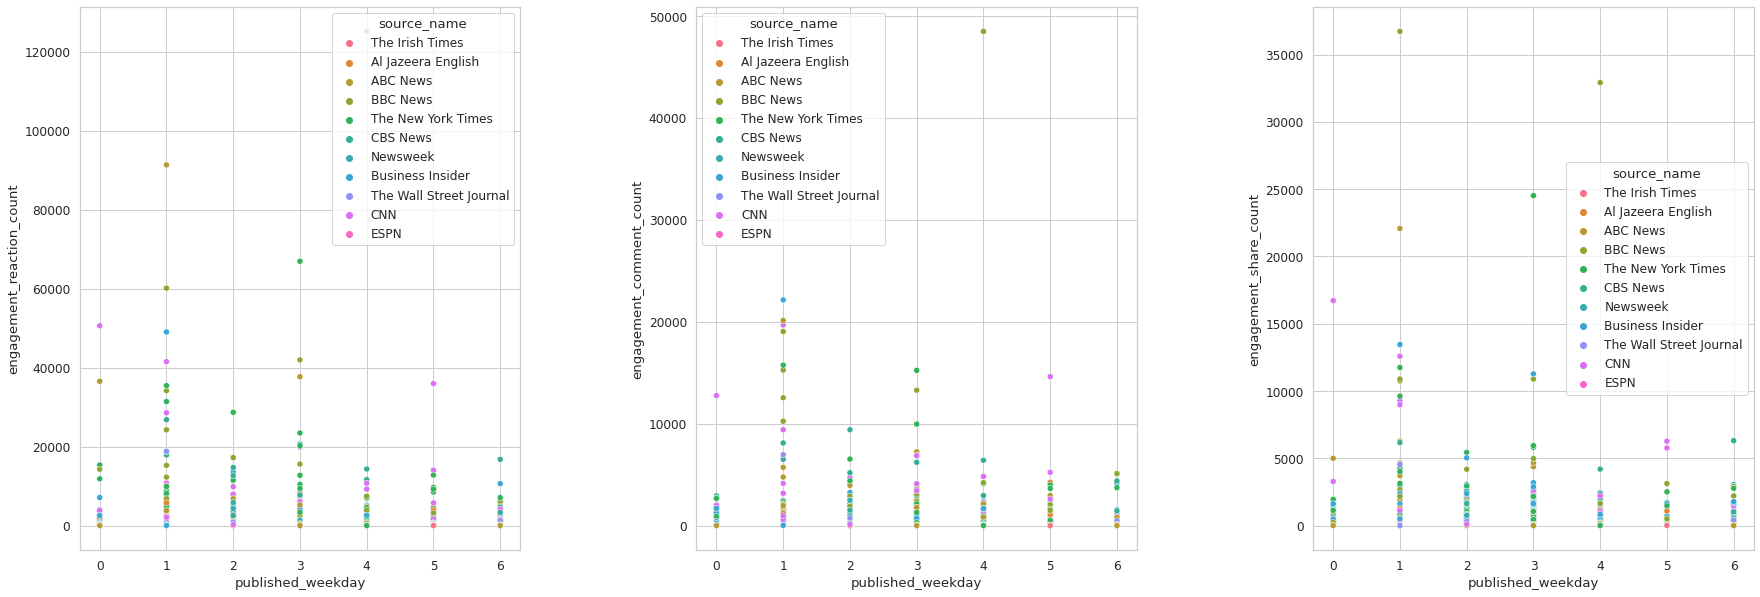

In [ ]:
# engagement of each weekdays
fig =plt.figure(figsize=(30,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i,y_label in enumerate(y_labels):
    le = fig.add_subplot(1,3,i+1)
    sns.scatterplot(data=df_date,x="published_weekday",y=y_label, hue="source_name")

There was a slight tendency for articles published in the afternoon to have higher engagement, but there was no significant difference in engagement by publication date. In addition, the date and time of publication does not seem to be fixed by the publisher.

# 4. Grip Characteristics of Popular Articles from Contents

Identify the titles and content trends of articles with high and low engagement.

In [ ]:
# Load packages
import nltk
from nltk.corpus import stopwords
import spacy
import nlplot
import re

from plotly.subplots import make_subplots

## 4-1. Preprocessing of titles and contents

Perform the following preprocessing on titles and contents. <br><br>
- Remove non-English characters
- Removing the stopword
- Morphological Analysis (remove noun, verb, adj, adv)

In [ ]:
# Preprocessing remove non-alphabetic
def remove_non_alphabetic(texts):

    text_list=[]

    for text in texts: 
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.replace("  ", " ")
        text_list.append(text)
    return text_list

# Preprocessing split and remove stopword
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(["reuters","u","li","say","said","says","saying"])

def remove_stopwords(text_list):
    texts_temp= [[word for word in text.lower().split() if word not in stop_words] for text in text_list]
    texts_list = [text[:-1] for text in texts_temp]

    return texts_list

# Preprocessing keep only noun,verb, adj, adv
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts_list, allowed_postags=['PROPN','VERB','NOUN','ADJ', 'ADV']):
   
    texts_pre=[]

    for sent in texts_list:
        doc = nlp(" ".join(sent)) 
        texts_pre.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_pre

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
contents = df_rev.content
titles = df_rev.title

# Preprocessing remove non-alphabetic
title_list= remove_non_alphabetic(titles)
content_list = remove_non_alphabetic(contents)

# Preprocessing split and remove stopword
title_list= remove_stopwords(title_list)
content_list = remove_stopwords(content_list)

# Preprocessing keep only noun,verb, adj, adv

title_list= lemmatization(title_list)
content_list = lemmatization(content_list)


In [ ]:
print(titles[0])
print(title_list[0])

print(contents[0])
print(content_list[0])

Unemployment falls to post-crash low of 5.2%
['unemployment', 'fall', 'post', 'crash']
The States jobless rate fell to 5.2 per cent last month, according to the latest official figures. This was higher than previously reported on account of an upward revision by the Central Statistics Office (CSO), one of several in the last two years.
Nonethe… [+800 chars]
['states', 'jobless', 'rate', 'fall', 'cent', 'last', 'month', 'accord', 'late', 'official', 'figure', 'high', 'previously', 'report', 'account', 'upward', 'revision', 'central', 'statistics', 'office', 'cso', 'several', 'last', 'year']


## 4-2. Visualize difference between popular and non-popular article 

To understand the trend of the articles, the following visualization is performed.
- Counting frequent words in articles
- Visualization of nodes and edges between words by co-occurrence network
- Visualize the result of co-occurrence network by sunburst chart

In [ ]:
df_rev["title_unigram"] = title_list
df_rev["content_unigram"] = content_list

In [ ]:
def plot_word_count(df,right, left, right_title, left_title, title,n_gram):

    npt_title = nlplot.NLPlot(df, target_col=left)
    npt_content = nlplot.NLPlot(df, target_col=right)

    fig_title= npt_title.bar_ngram(title='uni-gram',
                                xaxis_label='word_count',
                                yaxis_label='word',
                                ngram=n_gram,
                                top_n=15)

    fig_content = npt_content.bar_ngram(title='uni-gram',
                                xaxis_label='word_count',
                                yaxis_label='word',
                                ngram=n_gram,
                                top_n=15)

    # subplot
    trace1 = fig_title['data'][0]
    trace2 = fig_content['data'][0]

    fig = make_subplots(rows=1, cols=2, subplot_titles=(left_title, right_title), shared_xaxes=False)
    fig.update_xaxes(title_text='word count', row=1, col=1)
    fig.update_xaxes(title_text='word count', row=1, col=2)

    fig.update_layout(height=500, width=1700, title_text=title)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=1, col=2)
    fig.show()


In [115]:
df_rev_share50

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,title_unigram,content_unigram
18,cbs-news,CBS News,CBS News,Philadelphia district attorney exonerates 9 pe...,"Larry Krasner says, ""When somebody sits in a j...",https://www.cbsnews.com/news/philadelphia-dist...,https://cbsnews2.cbsistatic.com/hub/i/r/2019/0...,2019-09-03T13:29:40Z,Chester Hollman spent 27 years and 11 months i...,0.0,354.0,21.0,142.0,0.0,"[philadelphia, district, attorney, exonerate, ...","[chester, hollman, spend, year, month, prison,..."
19,business-insider,Business Insider,Sonam Sheth,Trump said he skipped a diplomatic trip to mon...,President Donald Trump told reporters last wee...,https://www.businessinsider.com/trump-skipped-...,https://amp.businessinsider.com/images/5c8fb32...,2019-09-03T15:31:09Z,President Donald Trump announced last week tha...,0.0,1161.0,1100.0,347.0,0.0,"[trump, skip, diplomatic, trip, monitor, hurri...","[president, donald, trump, announce, last, wee..."
24,cbs-news,CBS News,CBS/AP,Pence defends decision to stay at Trump Doonbe...,Pence's chief of staff Marc Short said that th...,https://www.cbsnews.com/news/vp-mike-pence-def...,https://cbsnews3.cbsistatic.com/hub/i/r/2019/0...,2019-09-03T11:10:54Z,Vice President Mike Pence's staff is defending...,0.0,2653.0,2006.0,485.0,0.0,"[pence, defend, decision, stay, trump, doonbeg]","[vice, president, mike, pence, staff, defendin..."
30,the-wall-street-journal,The Wall Street Journal,Julie Jargon,Phones Buzz in Class—With Texts From Mom and Dad,Schools are instituting phone bans to cut down...,https://www.wsj.com/articles/phones-buzz-in-cl...,https://images.wsj.net/im-102824/social,2019-09-03T09:49:27Z,Cellphone usage in class is getting so out of ...,0.0,77.0,22.0,67.0,0.0,"[phones, buzz, class, text, mom]","[cellphone, usage, class, get, control, school..."
32,cnn,CNN,"Jack Guy, CNN",Prince Harry launches sustainable travel initi...,"Prince Harry, the Duke of Sussex, has launched...",https://www.cnn.com/travel/article/prince-harr...,https://dynaimage.cdn.cnn.com/cnn/w_1200/http%...,2019-09-03T11:02:54Z,"(CNN) Prince Harry, the Duke of Sussex, has la...",0.0,279.0,54.0,175.0,0.0,"[prince, harry, launch, sustainable, travel, i...","[cnn, prince, harry, duke, sussex, launch, glo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,business-insider,Business Insider,Graham Rapier,Lyft is launching driver rewards because it an...,Uber and Lyft's recent product updates have al...,https://www.businessinsider.com/lyft-launches-...,https://image.businessinsider.com/5d960c4231c9...,2019-10-03T17:28:02Z,Lyft is launching a rewards program for driver...,0.0,0.0,0.0,2883.0,0.0,"[lyft, launch, driver, reward, uber, stop, cop...","[lyft, launching, rewards, program, driver, co..."
6918,bbc-news,BBC News,https://www.facebook.com/bbcnews,PSNI 'won't police custom checkpoints',"Chief constable, Simon Byrne, made the comment...",https://www.bbc.co.uk/news/uk-northern-ireland...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-10-03T15:11:30Z,Image caption\r\n The chief constable spoke to...,0.0,134.0,58.0,88.0,0.0,"[psni, police, custom]","[image, caption, chief, constable, speak, pm, ..."
6925,the-new-york-times,The New York Times,Richard A. Oppel Jr.,MGM Agrees to Pay Up to $800 Million to Victim...,The settlement would resolve claims that MGM w...,https://www.nytimes.com/2019/10/03/us/mgm-las-...,https://static01.nyt.com/images/2019/10/03/us/...,2019-10-03T15:26:19Z,The company had at first responded with an agg...,1.0,506.0,294.0,460.0,0.0,"[mgm, agree, pay, victim, las, vegas]","[company, first, respond, aggressive, legal, s..."
6926,the-wall-street-journal,The Wall Street Journal,Jared Council,"Body-recognition identifies by height, clothin...","Body-recognition identifies by height, clothin...",https://www.wsj.com/artic

## 4-3. Visualize the trend of popular articles

In [ ]:
#Visualize Top 15 words of highly shared news
df_rev_share50 = df_rev[df_rev.engagement_share_count > 50]

plot_word_count(df_rev_share50, 
                n_gram=2,
                left="title_unigram",
                right="content_unigram",
                left_title="title_word_top15",
                right_title="content_word_top15",
                title= '[bigram]  Share Count > 50 Word Count'
                )
#Filtering df for share count more than 50


100%|██████████| 1757/1757 [00:00<00:00, 42490.31it/s]


In [117]:
# Co-occurrence network

npt_title50 = nlplot.NLPlot(df_rev_share50, target_col="title_unigram")
npt_title50.build_graph(min_edge_frequency=4)


npt_title50.co_network(
    title='【Co-occurrence network】 Share Count > 50 Title',
)

node_size:149, edge_size:187


In [ ]:
npt_title50.sunburst(
    title='【sunburst chart】 Share Count > 50 Title',
)

It is expected that there will be a lot of engagement on the following articles on political matters.<br>

- News of Donald Trump's remarks
- Articles on Hurricane Dorian
- Hong Kong issue
- Saudi drone attack


## 4-4. Visualize the trend of non-popular articles

In [ ]:
#filtering df for share count zero
df_rev_share0 = df_rev[df_rev.engagement_share_count==0]


plot_word_count(df_rev_share0, 
                n_gram=2,
                left="title_unigram",
                right="content_unigram",
                left_title="title_word_top15",
                right_title="content_word_top15",
                title= '[bigram]  Share Count =0 Word Count'
                )


100%|██████████| 1495/1495 [00:00<00:00, 42603.32it/s]


In [ ]:
# Co-occurrence network

npt_title0 = nlplot.NLPlot(df_rev_share0, target_col="title_unigram")
npt_title0.build_graph(min_edge_frequency=4)


npt_title0.co_network(
    title='【Co-occurrence network】 Share Count = 0 Title',
)

node_size:73, edge_size:65


In [ ]:
npt_title0.sunburst(
    title='【sunburst chart】 Share Count = 0 Title',
)

The following types of articles do not have high engagement.
- Sports news articles (Rugby/ Football)
- Incident articles



# 5. Summarize Popular Article Characteristics

With this workspace, the trend of popular articles on Facebook engagement can be summarized as follows.

- With the exception of Reuters, each engagement (Reaction, Comment, Share) is highly correlated
- There is almost no difference in engagement by article author
- There is no significant difference in engagement based on the publication date
- Articles on political issues tend to be more widely engaged
- Engagement with sports articles and news about local events is small